## 1. Data Loading

In [27]:
import pandas as pd

df = pd.read_csv("Data/synthetic_food_dataset_imbalanced.csv")

print(df.shape)
df.head()


(31700, 16)


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


## 2. Data Understanding and Exploration

In [4]:
# Check missing values
df.isnull().sum()

Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

## 3. Data Preprocessing

In [5]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [6]:
df.isnull().sum()

Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64

## 4. Feature Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["Meal_Type", "Preparation_Method", "Is_Vegan", "Is_Gluten_Free"]

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [8]:
df["Food_Name"] = le.fit_transform(df["Food_Name"])


In [9]:
df[["Meal_Type", "Preparation_Method", "Is_Vegan", "Is_Gluten_Free", "Food_Name"]].head()

,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,1,1,0,0,6
1,3,3,0,1,4
2,3,3,0,0,2
3,2,1,0,1,9
4,3,0,0,0,3


## 5. Feature and Target Separation

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop("Food_Name", axis=1)
y = df["Food_Name"]


## 6. Feature Scaling and Train-Test Split

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## 7. Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9865930599369085

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       300
           1       0.97      0.98      0.98       240
           2       0.99      0.97      0.98      1000
           3       1.00      0.98      0.99       900
           4       0.99      0.99      0.99       600
           5       1.00      0.99      0.99       800
           6       0.96      0.99      0.98      1200
           7       1.00      0.98      0.99       200
           8       1.00      0.99      0.99       400
           9       0.99      1.00      0.99       700

    accuracy                           0.99      6340
   macro avg       0.99      0.99      0.99      6340
weighted avg       0.99      0.99      0.99      6340



## 8. Decision Tree Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=None
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9804416403785489

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       300
           1       0.98      0.96      0.97       240
           2       0.96      0.96      0.96      1000
           3       0.99      0.98      0.99       900
           4       0.99      1.00      0.99       600
           5       1.00      0.99      0.99       800
           6       0.95      0.97      0.96      1200
           7       0.99      0.98      0.98       200
           8       1.00      0.99      0.99       400
           9       1.00      0.99      0.99       700

    accuracy                           0.98      6340
   macro avg       0.98      0.98      0.98      6340
weighted avg       0.98      0.98      0.98      6340



## 9. Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.987223974763407

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       300
           1       0.99      0.98      0.99       240
           2       0.98      0.97      0.98      1000
           3       0.99      0.98      0.99       900
           4       0.99      1.00      0.99       600
           5       1.00      0.99      0.99       800
           6       0.97      0.99      0.98      1200
           7       0.99      0.99      0.99       200
           8       1.00      0.99      0.99       400
           9       1.00      0.99      0.99       700

    accuracy                           0.99      6340
   macro avg       0.99      0.99      0.99      6340
weighted avg       0.99      0.99      0.99      6340



## 10. Model Comparison

In [17]:
import pandas as pd

# Create model comparison table
model_results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest"
    ],
    "Accuracy": [
        0.9865,
        0.9804,
        0.9872
    ]
})

model_results


,Model,Accuracy
0,Logistic Regression,0.9865
1,Decision Tree,0.9804
2,Random Forest,0.9872


## 11. Confusion Matrix

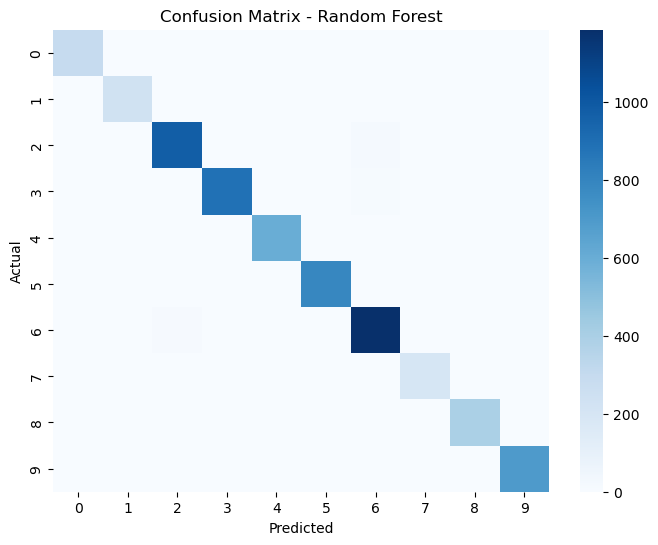

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 12. Model Saving

In [19]:
import joblib
import os

# Create models directory if not exists
os.makedirs("outputs/models", exist_ok=True)

# Save Random Forest model
joblib.dump(rf, "outputs/models/random_forest_model.pkl")

# Save scaler
joblib.dump(scaler, "outputs/models/scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


## 13. Cross-Validation

In [22]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf,
    X_scaled,
    y,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation accuracies: [0.98675079 0.9851735  0.99037855 0.98753943 0.98817035]
Mean CV accuracy: 0.987602523659306
